In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
data=pd.read_csv("car_age_price.csv")

In [142]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [143]:
data.shape

(112, 2)

In [144]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [145]:
data.nunique()

Year      8
Price    35
dtype: int64

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [147]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


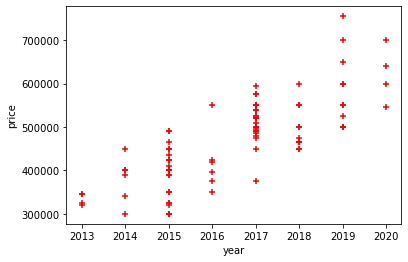

In [148]:
#Scatter plot betwen year and price
plt.scatter(data["Year"],data["Price"],color="red",marker="+")
plt.xlabel("year")
plt.ylabel("price")
plt.show()

In [149]:
#splitting x and y
X = data.drop('Price',axis=1)
y = data['Price']

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=143,test_size=0.2)

# Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression
la=LinearRegression()
la.fit(X_train,y_train)

LinearRegression()

In [152]:
la.score(X_test,y_test)

0.6159560502733572

In [153]:
la.score(X_train,y_train)

0.592675204435565

In [124]:
la.predict(X_test)

array([411314.41929425, 498221.17907012, 411314.41929425, 498221.17907012,
       498221.17907012, 411314.41929425, 498221.17907012, 411314.41929425,
       498221.17907012, 411314.41929425, 498221.17907012, 628581.3187339 ,
       541674.55895805, 498221.17907012, 498221.17907012, 585127.93884598,
       585127.93884598, 498221.17907012, 541674.55895805, 498221.17907012,
       498221.17907012, 411314.41929425, 541674.55895805])

# Predicting the price of a 2022 second -hand grand i10

In [127]:
la.coef_

array([43453.37988793])

In [128]:
la.intercept_

-87147246.05488418

In [137]:
#y=m*x+b equation of a straight line

In [136]:
43453.37988793*2022+(-87147246.05488418) # the expected price of 2022 second hand grandi10 is


715488.0785102844

In [ ]:
# Best fit line

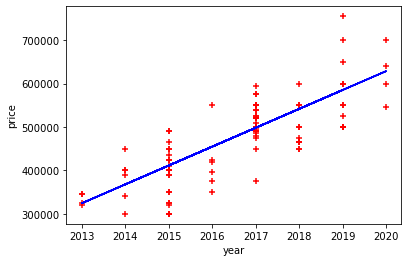

In [133]:
plt.scatter(data["Year"],data["Price"],color="red",marker="+")
plt.xlabel("year")
plt.ylabel("price")
plt.plot(data["Year"],la.predict(data[["Year"]]),color="blue")
plt.show()

# Lasso Regression

In [180]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=143,test_size=0.2)

In [181]:
from sklearn.linear_model import Lasso

In [182]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

53222.48168852288
0.6159560322762454


In [183]:
model_lasso.score(X_test,y_test)

0.6159560322762454

# Ridge Regression

In [185]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=1.0)
rd.fit(X_train,y_train)

Ridge()

In [186]:
rd.score(X_train,y_train)

0.5926657395071352

In [187]:
rd.score(X_test,y_test)

0.6151013668599559

In [ ]:
# giving different values to test size to see the difference of error value

In [47]:
X = data.drop('Price',axis=1)
y = data['Price']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=143,test_size=0.2)

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [50]:
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
print("mean squared error is:",mean_squared_error(y_test, prediction))
print("R squared value is:",r2_score(y_test, prediction))

mean squared error is: 2832632424.3420053
R squared value is: 0.6159560502733572


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=143,test_size=0.25)

In [54]:
lr=LinearRegression()
model2=lr.fit(X_train,y_train)
prediction2=model2.predict(X_test)


In [55]:
print("mean squared error is:",mean_squared_error(y_test, prediction2))
print("R squared value is:",r2_score(y_test, prediction2))

mean squared error is: 2455861456.1993423
R squared value is: 0.6963960236210189


In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=143,test_size=0.3)

In [63]:
lr=LinearRegression()
model3=lr.fit(X_train,y_train)
prediction3=model3.predict(X_test)


In [64]:
print("mean squared error is:",mean_squared_error(y_test, prediction3))
print("R squared value is:",r2_score(y_test, prediction3))

mean squared error is: 2488822214.192697
R squared value is: 0.6838279253798999


# Minmaxscaler

In [65]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)

In [66]:
type(X)

numpy.ndarray

In [67]:
X=pd.DataFrame(X,columns=["Year"])

In [68]:
type(X)

pandas.core.frame.DataFrame

In [69]:
X.describe()

,Year
count,112.000000
mean,0.524235
std,0.232802
min,0.000000
25%,0.285714
50%,0.571429
75%,0.571429
max,1.000000


In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=143,test_size=0.25)

In [73]:
lr=LinearRegression()
model4=lr.fit(X_train,y_train)
prediction4=model4.predict(X_test)


In [74]:
print("mean squared error is:",mean_squared_error(y_test, prediction4))
print("R squared value is:",r2_score(y_test, prediction4))

mean squared error is: 2455861456.199367
R squared value is: 0.6963960236210158


# Standardscaler

In [139]:
from sklearn.preprocessing import StandardScaler
std_scalr=StandardScaler()
X=std_scalr.fit_transform(X)


In [78]:
type(X)

numpy.ndarray

In [79]:
X=pd.DataFrame(X,columns=["Year"])

In [80]:
X.describe()

,Year
count,1.120000e+02
mean,4.361590e-17
std,1.004494e+00
min,-2.261967e+00
25%,-1.029167e+00
50%,2.036320e-01
75%,2.036320e-01
max,2.052831e+00


In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=143,test_size=0.25)

In [84]:
lr=LinearRegression()
model5=lr.fit(X_train,y_train)
prediction5=model5.predict(X_test)


In [85]:
print("mean squared error is:",mean_squared_error(y_test, prediction5))
print("R squared value is:",r2_score(y_test, prediction5))

mean squared error is: 2455861456.1993675
R squared value is: 0.6963960236210158
